# Prediksi Diabetes Menggunakan Naïve Bayes dan Random Forest

Proyek ini bertujuan untuk memprediksi kemungkinan seseorang menderita diabetes berdasarkan data medis menggunakan dua algoritma machine learning: **Naïve Bayes** dan **Random Forest**. Dataset yang digunakan merupakan data publik yang berisi fitur-fitur medis pasien seperti kadar glukosa, tekanan darah, BMI, dan lainnya.

## Tujuan Proyek:
- Membandingkan performa dua algoritma: Naïve Bayes dan Random Forest
- Menganalisis fitur-fitur yang berkontribusi terhadap prediksi diabetes


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("diabetes2.csv")  # ganti path jika diperlukan
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

              

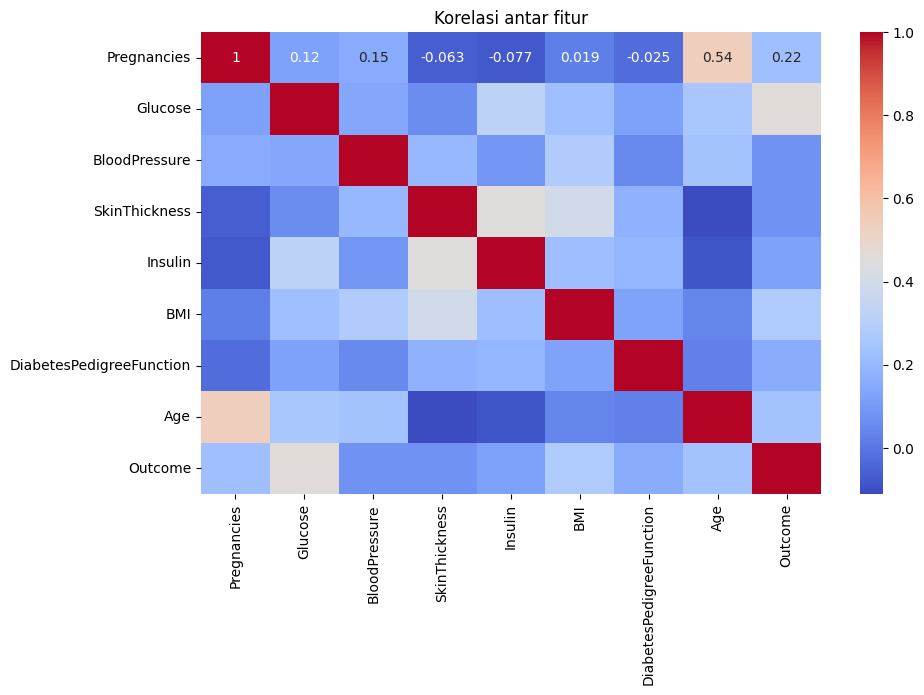

In [3]:
# Mengecek nilai kosong
print(df.isnull().sum())

# Statistik ringkas
print(df.describe())

# Korelasi antar fitur
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi antar fitur")
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Pisahkan fitur dan target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Evaluasi
print("Naïve Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_preds))
print("Classification Report:\n", classification_report(y_test, nb_preds))

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))


Naïve Bayes Accuracy: 0.7775
Confusion Matrix:
 [[220  33]
 [ 56  91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       253
           1       0.73      0.62      0.67       147

    accuracy                           0.78       400
   macro avg       0.77      0.74      0.75       400
weighted avg       0.77      0.78      0.77       400

Random Forest Accuracy: 0.99
Confusion Matrix:
 [[251   2]
 [  2 145]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       253
           1       0.99      0.99      0.99       147

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



## Kesimpulan

- Model **Random Forest** menunjukkan akurasi yang jauh lebih tinggi (**99%**) dibandingkan **Naïve Bayes** (**77.75%**).
- Hasil ini menunjukkan bahwa Random Forest dapat menjadi pilihan algoritma yang lebih andal untuk prediksi penyakit diabetes berbasis data medis.
- Fitur-fitur seperti `Glucose`, `BMI`, dan `Age` sangat mempengaruhi hasil prediksi.

Portofolio ini merupakan bagian dari pengembangan proyek skripsi yang ditujukan sebagai bukti kemampuan dalam bidang Data Science dan Machine Learning.
